<a href="https://colab.research.google.com/github/ElmiraSepehri/Student-Performance-Dataset/blob/main/Gp_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#loading the data
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
df = pd.read_csv("studentdata.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


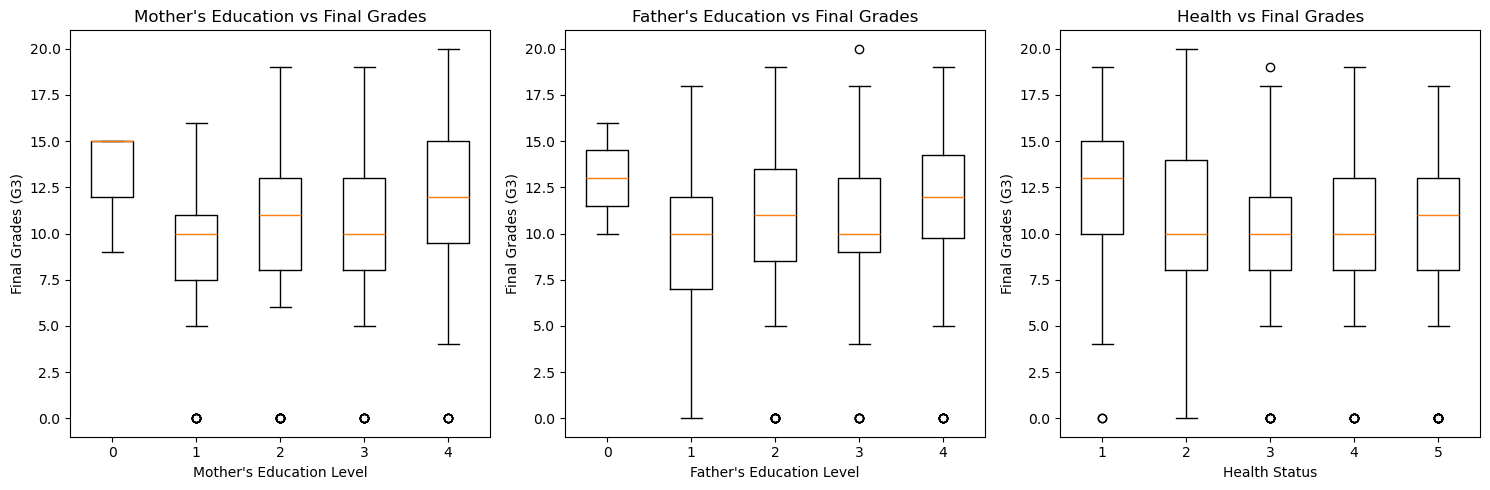

In [15]:

plt.figure(figsize=(15, 5))

# Boxplot 1: Mother's Education vs Final Grades
plt.subplot(1, 3, 1)
plt.boxplot([df['G3'][df['Medu'] == i] for i in sorted(df['Medu'].unique())])
plt.title("Mother's Education vs Final Grades")
plt.xlabel("Mother's Education Level")
plt.ylabel("Final Grades (G3)")
plt.xticks(ticks=range(1, 6), labels=sorted(df['Medu'].unique()))

# Boxplot 2: Father's Education vs Final Grades
plt.subplot(1, 3, 2)
plt.boxplot([df['G3'][df['Fedu'] == i] for i in sorted(df['Fedu'].unique())])
plt.title("Father's Education vs Final Grades")
plt.xlabel("Father's Education Level")
plt.ylabel("Final Grades (G3)")
plt.xticks(ticks=range(1, 6), labels=sorted(df['Fedu'].unique()))

# Boxplot 3: Health vs Final Grades
plt.subplot(1, 3, 3)
plt.boxplot([df['G3'][df['health'] == i] for i in sorted(df['health'].unique())])
plt.title("Health vs Final Grades")
plt.xlabel("Health Status")
plt.ylabel("Final Grades (G3)")
plt.xticks(ticks=range(1, 6), labels=sorted(df['health'].unique()))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [16]:
# Variables to test
variables = ['Medu', 'Fedu', 'health']
correlations = {}
results = {}

for var in variables:
    correlation_coefficient, p_value = stats.pearsonr(df[var], df['G3'])
    results[var] = {'correlation_coefficient': correlation_coefficient, 'p_value': p_value}

results_df = pd.DataFrame(results).T


print(results_df)

for var in variables:
    r, p_value = stats.pearsonr(df[var], df['G3'])
    correlations[var] = r

n = len(df['G3'])  # Number of observations
t_statistics = {}

for var in variables:
    r = correlations[var]
    t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
    t_statistics[var] = t_stat

t_stat_df = pd.DataFrame.from_dict(t_statistics, orient='index', columns=['T-statistic'])
print(t_stat_df)

        correlation_coefficient   p_value
Medu                   0.217147  0.000013
Fedu                   0.152457  0.002380
health                -0.061335  0.223877
        T-statistic
Medu       4.410009
Fedu       3.058090
health    -1.218205


In [17]:
import seaborn as sns
from scipy.stats import ttest_ind

#Create groups based on family size
failures_GT3 = df[df['famsize'] == 'GT3']['failures']
failures_LE3 = df[df['famsize'] == 'LE3']['failures']

#Performing t-test
t_stat, p_value = ttest_ind(failures_GT3, failures_LE3, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"p_value: {p_value}")

T-statistic: 0.3219637760028135
p_value: 0.7477813431154693


In [23]:

import statsmodels.stats.multicomp as mc

# convert the Mjob and Fjob columns to numerical values
df['Mjob'] = df['Mjob'].replace({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4})
df['Fjob'] = df['Fjob'].replace({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4})

In [25]:
# ANOVA test for Mjob vs G3
f_statistic, p_value = stats.f_oneway(df['G3'][df['Mjob'] == 1],
                                df['G3'][df['Mjob'] == 2],
                                df['G3'][df['Mjob'] == 3],
                                df['G3'][df['Mjob'] == 4])

print("Mother's Job vs Final Grade")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

Mother's Job vs Final Grade
F-Statistic: 3.2561467198237395
P-Value: 0.021868368745011472


In [20]:
comparisons = mc.MultiComparison(df['Mjob'], df['G3'])
table, arr1, arr2 = comparisons.allpairtest(stats.ttest_ind,  method='bonf')

table

C:\Users\sepehe\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


group1,group2,stat,pval,pval_corr,reject
0,4,-0.0598,0.9526,1.0,False
0,5,-0.1518,0.8801,1.0,False
0,6,0.3072,0.7599,1.0,False
0,7,-1.6271,0.1107,1.0,False
0,8,-0.891,0.3761,1.0,False
0,9,-1.3166,0.1927,1.0,False
0,10,0.2176,0.8282,1.0,False
0,11,-2.149,0.0345,1.0,False
0,12,-0.9526,0.3442,1.0,False
0,13,-0.046,0.9635,1.0,False


In [26]:
# ANOVA test for Fjob vs G3
f_statistic, p_value = stats.f_oneway(df['G3'][df['Fjob'] == 1],
                                df['G3'][df['Fjob'] == 2],
                                df['G3'][df['Fjob'] == 3],
                                df['G3'][df['Fjob'] == 4])

print("Father's Job vs Final Grade")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

Father's Job vs Final Grade
F-Statistic: 1.745312741076128
P-Value: 0.15729756570347


In [27]:
alpha = 0.05
dfn = len(df['G3'][df['Fjob'] == 1]) - 1
dfd = len(df['G3']) - len(df['G3'][df['Fjob'] == 1])

critical_value = stats.f.ppf(1 - alpha, dfn, dfd)
critical_value

1.6499242570359878

In [28]:
comparisons = mc.MultiComparison(df['Fjob'], df['G3'])
table, arr1, arr2 = comparisons.allpairtest(stats.ttest_ind,  method='bonf')

table

group1,group2,stat,pval,pval_corr,reject
0,4,0.3081,0.7597,1.0,False
0,5,-0.383,0.7036,1.0,False
0,6,0.3151,0.7539,1.0,False
0,7,0.1991,0.8431,1.0,False
0,8,0.5023,0.6171,1.0,False
0,9,0.1623,0.8716,1.0,False
0,10,0.3503,0.7269,1.0,False
0,11,-0.044,0.965,1.0,False
0,12,-0.6252,0.534,1.0,False
0,13,1.4977,0.1389,1.0,False


In [30]:
#Paid classes
no_paid_classes= df[df['paid']=='no']['G3']
did_paid_classes= df[df['paid'] == 'yes']['G3']

#Conducting t-test
stats.ttest_ind(no_paid_classes, did_paid_classes)

TtestResult(statistic=-2.0325971231028626, pvalue=0.04276506403357553, df=393.0)

In [31]:
#Seeing the means of each group
paid_classes = df.groupby('paid')['G3'].agg('mean')
paid_classes.to_frame().rename(columns={'G3':'Final Grades'})

,Final Grades
paid,
no,9.985981
yes,10.922652


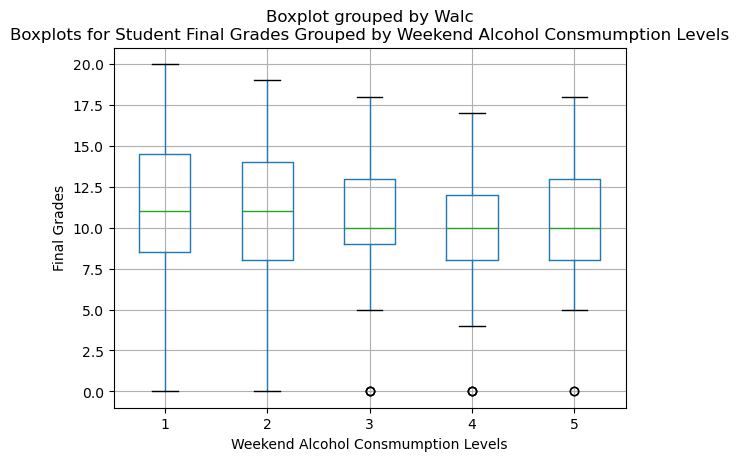

In [33]:
#Walc (Weekend alcohol consumption)
df.boxplot('G3', by = 'Walc')
plt.title('Boxplots for Student Final Grades Grouped by Weekend Alcohol Consmumption Levels')
plt.xlabel('Weekend Alcohol Consmumption Levels')
plt.ylabel('Final Grades')
plt.show()

In [34]:
#Seeing the means and standard deviation for each group
w_alc= df.groupby('Walc')
mean = w_alc['G3'].agg(['mean', 'std'])
mean

,mean,std
Walc,,
1,10.735099,5.133812
2,10.082353,4.950257
3,10.725000,3.700753
4,9.686275,3.619338
5,10.142857,4.125030


In [35]:
#Separate Scores for each group
Walc_one = df[df['Walc'] == 1]['G3']
Walc_two = df[df['Walc'] == 2]['G3']
Walc_three = df[df['Walc'] == 3]['G3']
Walc_four = df[df['Walc'] == 4]['G3']
Walc_five = df[df['Walc'] == 5]['G3']

In [36]:
#F-statistic from ANOVA
stats.f_oneway(Walc_one, Walc_two, Walc_three, Walc_four, Walc_five)

F_onewayResult(statistic=0.7331623695637165, pvalue=0.5697502070573542)

In [37]:
#Variables: Travel Time/Study Time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#EDA
#Mean/std
df[['traveltime', 'studytime', 'G3']].describe().T

,count,mean,std,min,25%,50%,75%,max
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


In [38]:
print(df.groupby('traveltime')['G3'].describe().T, "\n")
print(df.groupby('studytime')['G3'].describe().T)

traveltime           1           2          3          4
count       257.000000  107.000000  23.000000   8.000000
mean         10.782101    9.906542   9.260870   8.750000
std           4.523289    4.600108   5.074154   3.918819
min           0.000000    0.000000   0.000000   0.000000
25%           9.000000    8.000000   8.000000   8.500000
50%          11.000000   10.000000  10.000000  10.000000
75%          14.000000   13.000000  12.500000  10.250000
max          20.000000   19.000000  18.000000  13.000000 

studytime           1           2          3          4
count      105.000000  198.000000  65.000000  27.000000
mean        10.047619   10.171717  11.400000  11.259259
std          4.956311    4.217537   4.639504   5.281263
min          0.000000    0.000000   0.000000   0.000000
25%          8.000000    8.000000  10.000000   9.000000
50%         10.000000   11.000000  12.000000  12.000000
75%         13.000000   13.000000  15.000000  14.500000
max         19.000000   19.000000  19

array([[<Axes: title={'center': 'traveltime'}>,
        <Axes: title={'center': 'studytime'}>],
       [<Axes: title={'center': 'G3'}>, <Axes: >]], dtype=object)

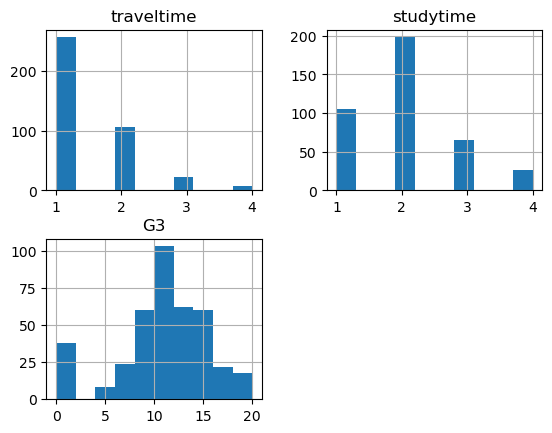

In [39]:
#Histogram
df.hist(column=['traveltime', 'studytime', 'G3'])

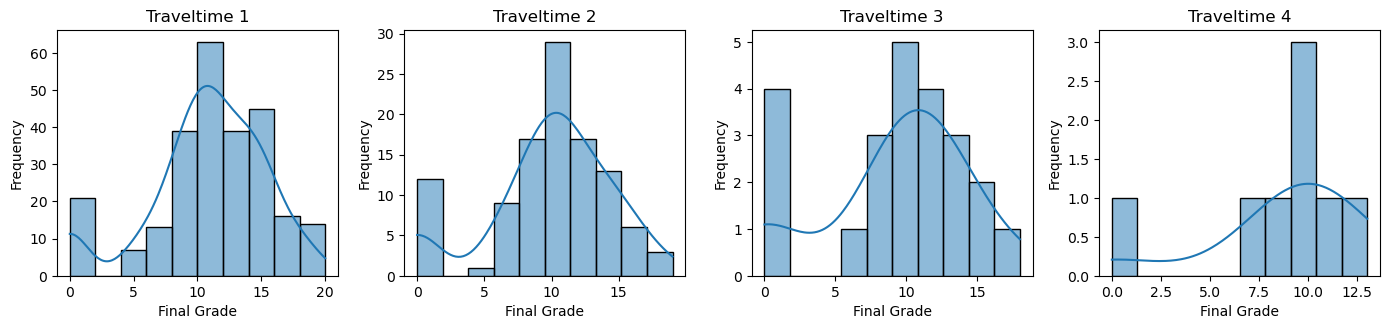

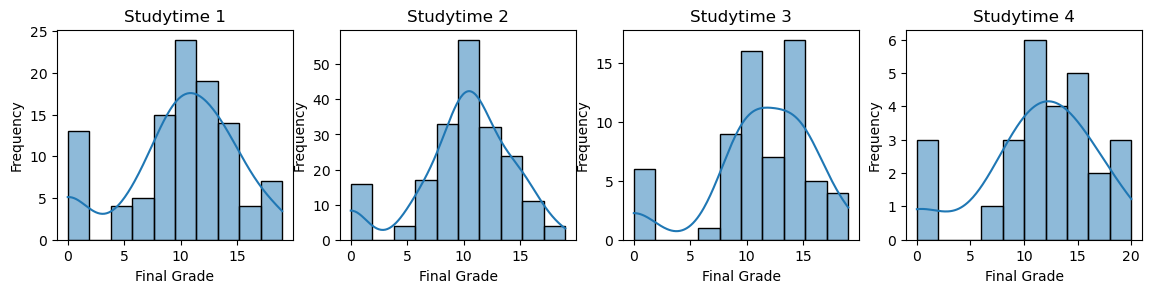

In [40]:
# Create histograms for traveltime categories
plt.figure(figsize=(14, 6))
for category in range(1, 5):  # Travel time categories: 1 to 4
    plt.subplot(2, 4, category)
    sns.histplot(df[df['traveltime'] == category]['G3'], kde=True, bins=10)
    plt.title(f'Traveltime {category}')
    plt.xlabel('Final Grade')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create histograms for studytime categories
plt.figure(figsize=(14, 6))
for category in range(1, 5):  # Study time categories: 1 to 4
    plt.subplot(2, 4, category)
    sns.histplot(df[df['studytime'] == category]['G3'], kde=True, bins=10)
    plt.title(f'Studytime {category}')
    plt.xlabel('Final Grade')
    plt.ylabel('Frequency')


Text(0, 0.5, 'Final Grade (G3)')

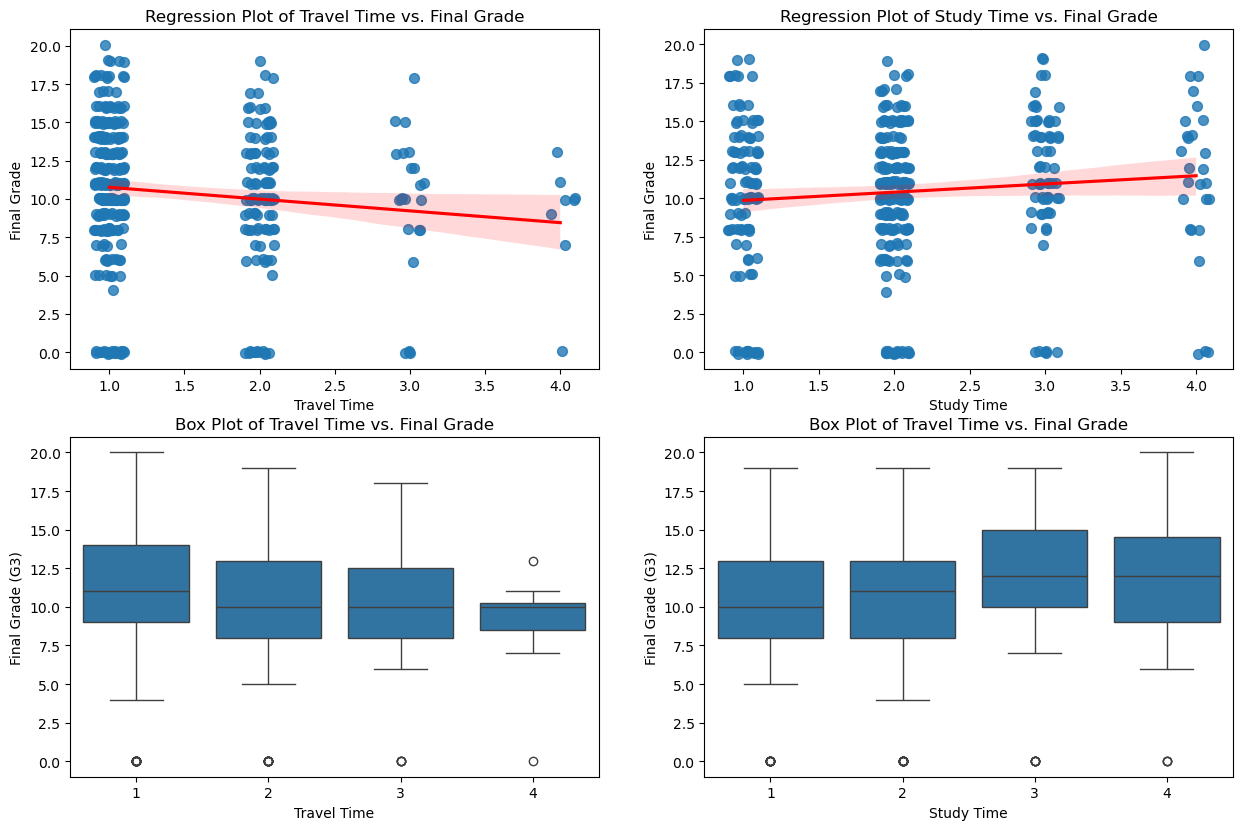

In [41]:
#Regression/Box PLots

fig = plt.figure(figsize = (15,15))

ax1 = fig.add_subplot(3,2,1)
sns.regplot(x='traveltime', y='G3', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ax=ax1, x_jitter=.1, y_jitter=.1)
plt.title('Regression Plot of Travel Time vs. Final Grade')
plt.xlabel('Travel Time')
plt.ylabel('Final Grade')

ax2 = fig.add_subplot(3,2,2)
sns.regplot(x='studytime', y='G3', data=df, scatter_kws={'s':50}, line_kws={'color':'red'}, ax=ax2, x_jitter=.1, y_jitter=.1)
plt.title('Regression Plot of Study Time vs. Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')

#Box Plot
ax3 = fig.add_subplot(3,2,3)
sns.boxplot(x='traveltime',y='G3', data=df, ax=ax3)
plt.title('Box Plot of Travel Time vs. Final Grade')
plt.xlabel('Travel Time')
plt.ylabel('Final Grade (G3)')

ax4 = fig.add_subplot(3,2,4)
sns.boxplot(x='studytime',y='G3', data=df, ax=ax4)
plt.title('Box Plot of Travel Time vs. Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')


In [42]:
#Correlation Matrix
df[['G3', 'studytime', 'traveltime']].corr(method='spearman')

,G3,studytime,traveltime
G3,1.00000,0.105170,-0.120530
studytime,0.10517,1.000000,-0.105969
traveltime,-0.12053,-0.105969,1.000000


In [43]:
#ANOVA f-stat and p-value

#Travel time vs final grade
f_stat, p_value = stats.f_oneway(df['G3'][df['traveltime'] == 1],
                                df['G3'][df['traveltime'] == 2],
                                df['G3'][df['traveltime'] == 3],
                                df['G3'][df['traveltime'] == 4])

print("Travel:")
print(f' F-statistic: {f_stat}')
print(f'P-value: {p_value} \n')

#Study time vs final grade
f_stat, p_value = stats.f_oneway(df['G3'][df['studytime'] == 1],
                                df['G3'][df['studytime'] == 2],
                                df['G3'][df['studytime'] == 3],
                                df['G3'][df['studytime'] == 4])

print('Study:')
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

Travel:
 F-statistic: 1.8397512190059848
P-value: 0.13937884626846256 

Study:
F-statistic: 1.7278351054436039
P-value: 0.1607228096836598


In [44]:
# Check normality of traveltime
stat, p_value = stats.shapiro(df['traveltime'])
print(f'Traveltime Shapiro-Wilk p-value: {p_value}')

# Check normality of studytime
stat, p_value = stats.shapiro(df['studytime'])
print(f'Studytime Shapiro-Wilk p-value: {p_value}')

Traveltime Shapiro-Wilk p-value: 2.3103029338175114e-27
Studytime Shapiro-Wilk p-value: 6.54620434132369e-20


In [45]:
#Kruskal-Wallis H Test
from scipy.stats import kruskal

travel1 = df[df['traveltime'] == 1]['G3']
travel2 = df[df['traveltime'] == 2]['G3']
travel3 = df[df['traveltime'] == 3]['G3']
travel4 = df[df['traveltime'] == 4]['G3']

h_stat, p_value = kruskal(travel1, travel2, travel3, travel4)
print(f'Travel time Kruskal-Wallis H-statistic: {h_stat}')
print(f'Travel time P-value: {p_value}')

study1 = df[df['studytime'] == 1]['G3']
study2 = df[df['studytime'] == 2]['G3']
study3 = df[df['studytime'] == 3]['G3']
study4 = df[df['studytime'] == 4]['G3']

h_stat, p_value = kruskal(study1, study2, study2, study2)
print(f'Study time Kruskal-Wallis H-statistic: {h_stat}')
print(f'Study time P-value: {p_value}')

Travel time Kruskal-Wallis H-statistic: 6.1374307681868165
Travel time P-value: 0.1051120324043773
Study time Kruskal-Wallis H-statistic: 0.009137724955140607
Study time P-value: 0.999768321516853


In [47]:

# Include other variables we want to control for in addition to travel time
X = df[['traveltime', 'studytime']]
X = sm.add_constant(X)
y = df['G3']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     4.244
Date:                Fri, 30 May 2025   Prob (F-statistic):             0.0150
Time:                        16:14:28   Log-Likelihood:                -1156.9
No. Observations:                 395   AIC:                             2320.
Df Residuals:                     392   BIC:                             2332.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4806      0.804     13.042      0.0